In [1]:
import numpy as np
import matplotlib.pyplot as plt

Our spline consists of 3 elements. Each part has a 3rd order polynomial that crosses the boundary points of the element

! Note the points are ${(0,0),(1,1),(2,1),(3,2)}$

The piecewise polynomials $p_1, p_2, p_3$ need to fulfill the following criteria


$p_1(0)=0$  and $p_1(1)=1$

$p_2(1)=1$ and $p_2(2)=1$

$p_3(2)=1$ and $p_3(3)=2$

$p_1'(1)=p_2'(1)$  and $p_1''(1)=p_2''(1)$

$p_2'(2)=p_3'(2)$  and $p_2''(2)=p_3''(2)$

knot a knot

$\lim\limits_{x\rightarrow 1^-}p_1'''(x)=\lim\limits_{x\rightarrow 1^+}p_2'''(x)$  and $\lim\limits_{x\rightarrow 2^-}p_2'''(x)=\lim\limits_{x\rightarrow 2^+}p_3'''(x)$


Assume

$p_1(x)=a_0 +a_1 x+a_2 x^2 +a_3^3$

$p_2(x)=b_0 +b_1 x+b_2 x^2 +b_3^3$

$p_3(x)=c_0 +c_1 x+c_2 x^2 +c_3^3$

Plug in numbers and arrive at the linear system where $\vec{v} = (a_0, a_1, a_2, a_3, b_0, b_1, b_2, b_3, c_0, c_1, c_2, c_3)^T$

$\hat{A} \vec{v}=\vec{c}$

Write down $\hat{A}$ as numpy matrix directly

In [2]:
def e(x):
    return (1,x,x**2,x**3)

def f_der(x):
    return (0,1,2*x,3*x**2)

def s_der(x):
    return (0,0,2,6*x)

In [3]:
for i in [1,2]:
    print(f_der(i))

(0, 1, 2, 3)
(0, 1, 4, 12)


In [4]:
A = np.array([
[1,0,0,0,0,0,0,0,0,0,0,0],
[1,1,1,1,0,0,0,0,0,0,0,0],
[0,0,0,0,1,1,1,1,0,0,0,0],
[0,0,0,0,1,2,4,8,0,0,0,0],
[0,0,0,0,0,0,0,0,1,2,4,8],
[0,0,0,0,0,0,0,0,1,3,9,27],
[0,-1,-2,-3,0,1,2,3,0,0,0,0],
[0,0,-2,-6,0,0,2,6,0,0,0,0],
[0,0,0,0,0,-1,-4,-12,0,1,4,12],
[0,0,0,0,0,0,-2,-12,0,0,2,12],
[0,0,0,1,0,0,0,-1,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,-1],
])

In [5]:
A

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   1,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   2,   4,   8,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   4,   8],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   9,  27],
       [  0,  -1,  -2,  -3,   0,   1,   2,   3,   0,   0,   0,   0],
       [  0,   0,  -2,  -6,   0,   0,   2,   6,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  -1,  -4, -12,   0,   1,   4,  12],
       [  0,   0,   0,   0,   0,   0,  -2, -12,   0,   0,   2,  12],
       [  0,   0,   0,   1,   0,   0,   0,  -1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,  -1]])

In [6]:
c = np.array([0,1,1,1,1,2,0,0,0,0,0,0])

In [7]:
v = np.linalg.solve(A,c)

In [8]:
v

array([ 0.00000000e+00,  2.16666667e+00, -1.50000000e+00,  3.33333333e-01,
       -8.88178420e-16,  2.16666667e+00, -1.50000000e+00,  3.33333333e-01,
        8.88178420e-16,  2.16666667e+00, -1.50000000e+00,  3.33333333e-01])

In [9]:
np.dot(A,v)

array([ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.00000000e+00,  2.77555756e-16,  1.11022302e-16,
        2.22044605e-16,  6.66133815e-16, -3.88578059e-16,  0.00000000e+00])

In [10]:
p1 = np.poly1d(v[:4])
p2 = np.poly1d(v[4:8])
p3 = np.poly1d(v[8:])

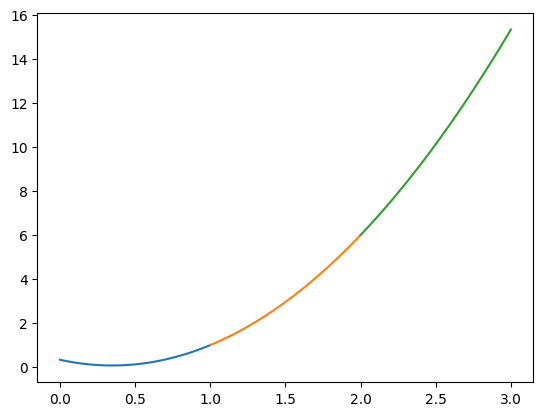

In [11]:
x_1 = np.linspace(0,1)
x_2 = np.linspace(1,2)
x_3 = np.linspace(2,3)
fig, ax = plt.subplots(1,1)
ax.plot(x_1, np.polyval(v[:4],x_1))
ax.plot(x_2, p2(x_2))
ax.plot(x_3, p3(x_3))

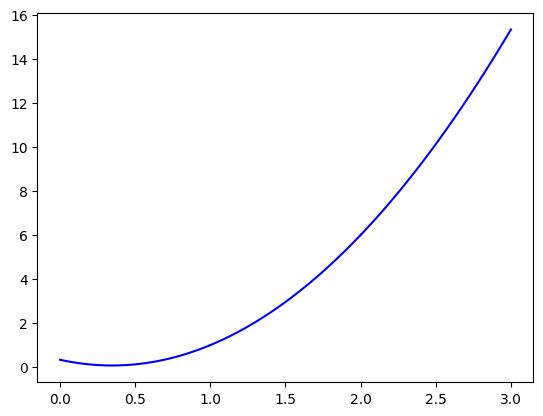

In [25]:
x_1 = np.linspace(0,1)
x_2 = np.linspace(1,2)
x_3 = np.linspace(2,3)
fig, ax = plt.subplots(1,1)
ax.plot(x_1, p1(x_1), c='blue')
ax.plot(x_2, p2(x_2), c='blue')
ax.plot(x_3, p3(x_3), c='blue')

In [60]:
from scipy.interpolate import CubicSpline

In [62]:
cs  = CubicSpline([0,1,2,3],[0,1,1,2])

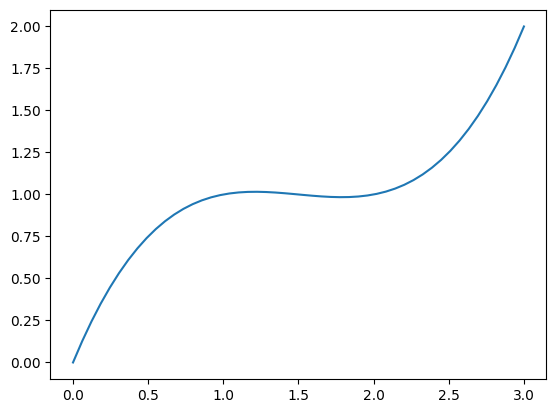

In [63]:
x = np.linspace(0,3)
y = cs(x)

plt.plot(x,y)

$||f-p||_{\infty} <= ||w_4^{Cheb}|| \frac{||f^{(4)}||}{24}$


$ = 2\frac{(b-a)^4}{4}  \frac{1}{12} $

$= \frac{2 \cdot 3^4}{12 \cdot 4^4}$